In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")  # Path to the compressed dataset

    if not tarball_path.is_file():  # If the file doesn't exist locally
        Path("datasets").mkdir(parents=True, exist_ok=True)  # Create the 'datasets' directory if needed

        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # URL to download the dataset
        urllib.request.urlretrieve(url, tarball_path)  # Download the .tgz file from the URL and save it locally

        with tarfile.open(tarball_path) as housing_tarball:  # Open the .tgz file as a tar archive
            housing_tarball.extractall(path="datasets")  # Extract all contents into the 'datasets' directory

    return pd.read_csv(Path("datasets/housing/housing.csv"))  # Load the CSV data into a DataFrame and return it

housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Categorizing median_income

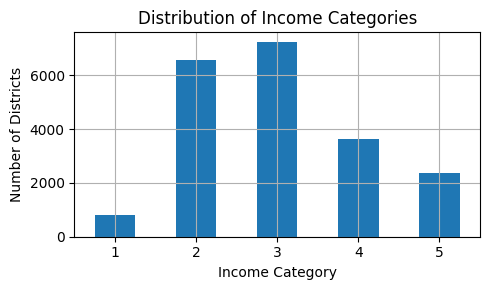

In [4]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Set smaller figure size before plotting
plt.figure(figsize=(5, 3))  # width=5, height=3 inches

# Plot the distribution of income categories
housing["income_cat"].value_counts().sort_index().plot(
    kind="bar", rot=0, grid=True
)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.title("Distribution of Income Categories")
plt.tight_layout()
plt.show()

### Stratified 10 Split but use only One

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up the splitter
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Collect all splits
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]

### Get Only 1 Stratified Split

In [10]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=42
)

### Confirming Stratified Split

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64